In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import os

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import Linear regression

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold

import seaborn as sns

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library
import time
print('Libraries imported.')

Libraries imported.


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_03d046a0c8604ee591e9c119e71724c6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4QMgPff2ruLYwJ8ubpRJby78JEIraPLJnbDO6rvXYZjY',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_03d046a0c8604ee591e9c119e71724c6.get_object(Bucket='datascienceproject-donotdelete-pr-8pcd1twlmkqgk8',Key='kc_house_data_1000.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df = pd.read_csv(body)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8718500275,20140715T000000,390000.0,3,2.75,1950,12240,1.0,0,0,3,7,1250,700,1956,0,98028,47.7401,-122.258,1880,12000
1,3575305495,20150413T000000,660000.0,5,2.25,3740,14913,1.5,0,0,4,9,3740,0,1979,0,98074,47.6234,-122.059,2180,7600
2,411100020,20141117T000000,310000.0,3,1.75,1140,8263,1.0,0,0,5,7,1140,0,1950,0,98155,47.7407,-122.327,1140,6770
3,9113200020,20140612T000000,717000.0,3,2.50,2480,5137,2.0,0,0,3,9,2480,0,2000,0,98052,47.6840,-122.164,2480,6023
4,2011400019,20141230T000000,260000.0,5,2.50,2580,11250,1.0,0,0,3,7,1410,1170,1964,0,98198,47.3970,-122.313,2240,11780


In [3]:
#Replace '0'  in yr_renovated to yr_built values
df['yr_renovated'].replace(0, df['yr_built'],inplace=True)
df.head()
#drop columns
df_reg=df.drop(['date','sqft_living15','sqft_lot15'], axis=1)
#replace years with age
df_reg['yr_built']=2015-df['yr_built']
df_reg['yr_renovated']=2015-df['yr_renovated']
df_reg.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,8718500275,390000.0,3,2.75,1950,12240,1.0,0,0,3,7,1250,700,59,59,98028,47.7401,-122.258
1,3575305495,660000.0,5,2.25,3740,14913,1.5,0,0,4,9,3740,0,36,36,98074,47.6234,-122.059
2,411100020,310000.0,3,1.75,1140,8263,1.0,0,0,5,7,1140,0,65,65,98155,47.7407,-122.327
3,9113200020,717000.0,3,2.50,2480,5137,2.0,0,0,3,9,2480,0,15,15,98052,47.6840,-122.164
4,2011400019,260000.0,5,2.50,2580,11250,1.0,0,0,3,7,1410,1170,51,51,98198,47.3970,-122.313


In [4]:
df_reg.rename(columns={"yr_built": "age", "yr_renovated": "time_since_renov", "price": "House Price"}, inplace=True)
df_reg.head()
#df_reg.shape

,id,House Price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,time_since_renov,zipcode,lat,long
0,8718500275,390000.0,3,2.75,1950,12240,1.0,0,0,3,7,1250,700,59,59,98028,47.7401,-122.258
1,3575305495,660000.0,5,2.25,3740,14913,1.5,0,0,4,9,3740,0,36,36,98074,47.6234,-122.059
2,411100020,310000.0,3,1.75,1140,8263,1.0,0,0,5,7,1140,0,65,65,98155,47.7407,-122.327
3,9113200020,717000.0,3,2.50,2480,5137,2.0,0,0,3,9,2480,0,15,15,98052,47.6840,-122.164
4,2011400019,260000.0,5,2.50,2580,11250,1.0,0,0,3,7,1410,1170,51,51,98198,47.3970,-122.313


In [5]:
# Save the intermediate dataframe for troubleshooting convience.
df_reg.to_csv('house_data_updated.csv')


In [6]:
# Load the intermediate dataframe.
df = pd.read_csv('house_data_updated.csv', index_col=0)

# Inspect the dataframe.
print(df.shape)
df.head(10)

(1001, 18)


,id,House Price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,time_since_renov,zipcode,lat,long
0,8718500275,390000.0,3,2.75,1950,12240,1.0,0,0,3,7,1250,700,59,59,98028,47.7401,-122.258
1,3575305495,660000.0,5,2.25,3740,14913,1.5,0,0,4,9,3740,0,36,36,98074,47.6234,-122.059
2,411100020,310000.0,3,1.75,1140,8263,1.0,0,0,5,7,1140,0,65,65,98155,47.7407,-122.327
3,9113200020,717000.0,3,2.50,2480,5137,2.0,0,0,3,9,2480,0,15,15,98052,47.6840,-122.164
4,2011400019,260000.0,5,2.50,2580,11250,1.0,0,0,3,7,1410,1170,51,51,98198,47.3970,-122.313
5,3912000020,745000.0,3,2.00,2290,5001,1.0,0,0,4,7,1490,800,55,55,98103,47.6909,-122.339
6,8078370010,470000.0,4,2.50,2320,12042,1.0,0,0,4,7,1320,1000,40,40,98072,47.7630,-122.160
7,5104650020,429000.0,3,2.50,2530,8820,2.0,0,0,3,8,2530,0,18,18,98031,47.4200,-122.205
8,7417700664,220000.0,4,2.00,1400,7140,1.0,0,0,3,7,1400,0,46,46,98155,47.7719,-122.309
9,2770604920,497000.0,3,3.00,2060,1850,2.0,0,0,3,8,1400,660,8,8,98119,47.6543,-122.373


In [7]:
#Foursquare credentials
CLIENT_ID = 'PXTM1WUKCU3DWALEMR0HYTTLFUH0JMCMSH4LHQXQ00URVUOA' # Foursquare ID
CLIENT_SECRET = 'IGU3XEC5BDLW11RT50TYX5ZEPKNAPLXIY5J5TAVMVZJIAJTS' #  Foursquare Secret
VERSION = '20190918' # Foursquare API version


In [8]:
# Function to get the venues within a 5 km radius (by default).
def get_venues(names, latitudes, longitudes, radius=1000, section='food'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        if section in ['food', 'drinks', 'coffee', 'shops', 'arts', 'outdoors', 'sights','trending', 'topPicks', 'medical']:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=200&section={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius,
                section)
        else:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=200&query={}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION, 
                    lat, 
                    lng, 
                    radius,
                    section)
            
        # Make the GET request.
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            return np.array([])
        
        # Return only relevant information for each nearby venue.
        try:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                '') for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list],
        columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])
    
    return(nearby_venues)

### Fill the dataframe with corresponding numbers of specific venues

In [9]:
# Add new columns.
df['Restaurants'] = np.nan
df['Cafes'] = np.nan
df['Bars'] = np.nan
df['Outdoors & Recreation'] = np.nan
df['Shops'] = np.nan
df['Health Care'] = np.nan
df['Schools'] = np.nan

# Populate the added columns with venue numbers
venues = [
        'restaurant',
        'coffee',
        'drinks',
        'outdoors',
        'shops',
        'medical',
        'school'           ]
for k in range(df.shape[0]):
    stats = [get_venues([df.iloc[k, df.columns.get_loc('id')]],
                        [df.iloc[k, df.columns.get_loc('lat')]],
                        [df.iloc[k, df.columns.get_loc('long')]],
                        section=venue).shape[0]
             for venue in venues]
    print('(%d) %s: %s'
              % (k, df.iloc[k, df.columns.get_loc('id')], str(stats)))
    df.iloc[k, df.columns.get_loc('Restaurants')] = stats[0]
    df.iloc[k, df.columns.get_loc('Cafes')] = stats[1]
    df.iloc[k, df.columns.get_loc('Bars')] = stats[2]
    df.iloc[k, df.columns.get_loc('Outdoors & Recreation')] = stats[3]
    df.iloc[k, df.columns.get_loc('Shops')] = stats[4]
    df.iloc[k, df.columns.get_loc('Health Care')] = stats[5]
    df.iloc[k, df.columns.get_loc('Schools')] = stats[6]


(0) 8718500275: [3, 2, 1, 4, 4, 6, 0]
(1) 3575305495: [1, 0, 0, 3, 8, 4, 2]
(2) 411100020: [1, 3, 3, 8, 12, 14, 4]
(3) 9113200020: [7, 4, 4, 3, 20, 22, 4]
(4) 2011400019: [11, 4, 3, 1, 26, 17, 4]
(5) 3912000020: [22, 6, 6, 19, 51, 47, 7]
(6) 8078370010: [25, 6, 16, 20, 88, 67, 6]
(7) 5104650020: [18, 4, 1, 5, 15, 32, 2]
(8) 7417700664: [13, 4, 4, 6, 34, 32, 5]
(9) 2770604920: [41, 12, 16, 23, 97, 86, 5]
(10) 1930300190: [96, 34, 43, 63, 100, 100, 8]
(11) 3024079069: [0, 0, 0, 0, 0, 0, 0]
(12) 723069049: [1, 0, 0, 2, 4, 6, 0]
(13) 2210500019: [1, 0, 0, 9, 4, 12, 2]
(14) 3856901435: [21, 7, 7, 28, 27, 33, 9]
(15) 3948900050: [17, 3, 6, 18, 38, 37, 3]
(16) 5412400170: [2, 0, 0, 2, 3, 5, 2]
(17) 2856102280: [15, 11, 6, 20, 24, 37, 6]
(18) 3288100290: [12, 4, 4, 5, 17, 29, 1]
(19) 5145000190: [0, 0, 0, 3, 3, 0, 4]
(20) 6679000170: [2, 1, 0, 3, 4, 4, 0]
(21) 9536601045: [10, 5, 1, 7, 23, 23, 2]
(22) 8731981410: [3, 2, 1, 3, 5, 7, 1]
(23) 3574801350: [2, 0, 0, 5, 3, 6, 3]
(24) 1922069099: [0,

In [10]:
df.head()

# Save the intermediate dataframe for troubleshooting convience.
df.to_csv('house_data_updated_new.csv')


In [11]:
df = pd.read_csv('house_data_updated_new.csv', index_col=0)

In [12]:
df.drop(df.tail(303).index,inplace=True)

In [13]:
df.tail()

,id,House Price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,time_since_renov,zipcode,lat,long,Restaurants,Cafes,Bars,Outdoors & Recreation,Shops,Health Care,Schools
693,1224059049,810000.0,3,1.75,1980,13503,1.0,0,2,4,9,1320,660,63,63,98008,47.5867,-122.111,2.0,0.0,0.0,6.0,2.0,8.0,1.0
694,3348401319,372500.0,5,3.00,2480,10090,1.0,0,0,3,7,1300,1180,11,11,98178,47.4964,-122.263,2.0,1.0,0.0,5.0,3.0,6.0,2.0
695,5589300585,325000.0,3,1.00,1050,9083,1.0,0,0,3,7,1050,0,64,64,98155,47.7533,-122.307,7.0,4.0,4.0,12.0,23.0,24.0,5.0
696,3293700221,280000.0,3,1.00,1260,7660,1.0,0,0,3,6,1260,0,68,68,98133,47.7476,-122.350,21.0,6.0,4.0,7.0,52.0,39.0,4.0
697,2013300050,258000.0,3,2.00,1680,19978,1.0,0,0,3,6,880,800,67,67,98198,47.3924,-122.308,8.0,3.0,2.0,2.0,30.0,21.0,6.0


## Exploratory Data Analysis

In [14]:
# Summarize the data.
numeric_columns = [
        'bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'condition',
        'grade',
        'sqft_above',
        'sqft_basement',
        'age',
        'time_since_renov',
        'Restaurants',
        'Bars',
        'Shops',
        'Cafes',
        'Health Care',
        'Outdoors & Recreation',
        'Schools',
        'House Price']
# Print the basic statistics.
df_num = df[numeric_columns]
df_num.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,age,time_since_renov,Restaurants,Bars,Shops,Cafes,Health Care,Outdoors & Recreation,Schools,House Price
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,3.438395,2.093481,2108.613181,15389.458453,3.428367,7.669054,1815.038682,293.574499,45.435530,43.561605,13.061605,3.666189,24.283668,3.823782,24.808023,9.287966,3.343840,5.190039e+05
std,0.884954,0.719390,863.452894,32346.840326,0.637110,1.146732,818.361543,439.103702,26.947731,27.066204,18.260837,6.596510,28.072356,5.291953,26.201248,10.686421,3.187916,2.960476e+05
min,0.000000,0.750000,390.000000,1032.000000,2.000000,4.000000,390.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.900000e+04
25%,3.000000,1.750000,1500.000000,5700.000000,3.000000,7.000000,1250.000000,0.000000,25.000000,22.000000,1.000000,0.000000,4.000000,0.000000,6.000000,3.000000,1.000000,3.199125e+05
50%,3.000000,2.250000,1960.000000,7969.500000,3.000000,7.000000,1595.000000,0.000000,42.000000,39.000000,6.000000,1.500000,13.000000,2.000000,14.000000,6.000000,2.500000,4.525000e+05
75%,4.000000,2.500000,2547.500000,11341.500000,4.000000,8.000000,2200.000000,600.000000,62.000000,59.750000,17.000000,4.000000,33.750000,5.000000,33.000000,11.000000,5.000000,6.471062e+05
max,7.000000,5.250000,6810.000000,434728.000000,5.000000,13.000000,6110.000000,2850.000000,115.000000,115.000000,100.000000,63.000000,100.000000,35.000000,100.000000,69.000000,18.000000,2.850000e+06


### Plot the feature histograms to explore varience in feature values

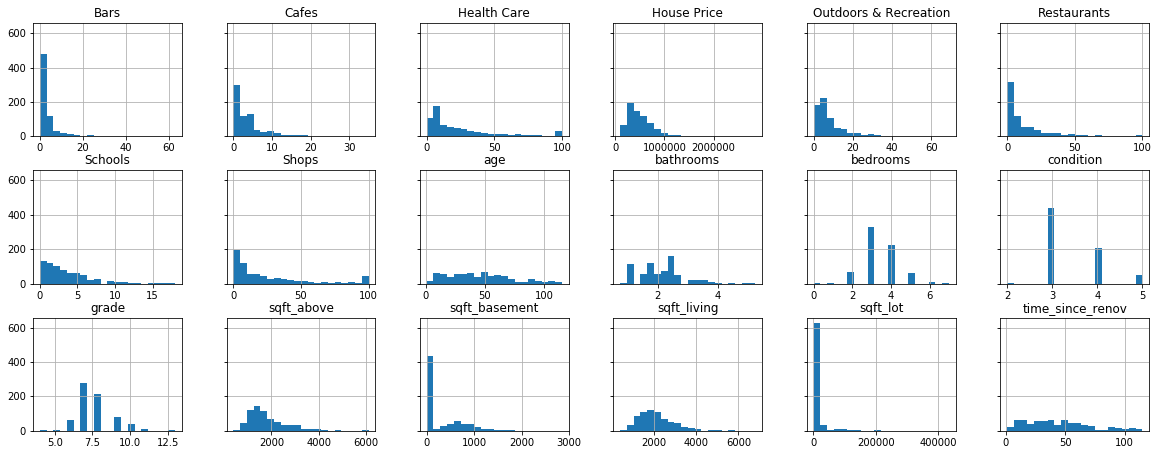

In [15]:
#Plot the feature histograms to explore varience in feature values
df_num.hist(figsize=(20, 7.5), bins=20, sharey=True, layout=(3,6))
plt.show()

In [16]:
#df=df['House Price']<1500000
#df.head()

### Explore correlations between variables

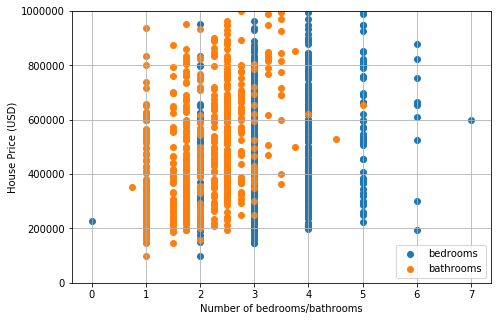

In [17]:
vars = ['bedrooms',
        'bathrooms',
        ]
# Iterate over feature names.
for var in vars:
    plt.scatter(df_num[var],
                df_num['House Price'],
                label=var)
plt.xlabel('Number of bedrooms/bathrooms')
plt.ylabel('House Price (USD)')
plt.gcf().set_size_inches(7.5, 5)
plt.ylim(0, 1000000)
plt.grid()
plt.legend(loc='best')
plt.show()

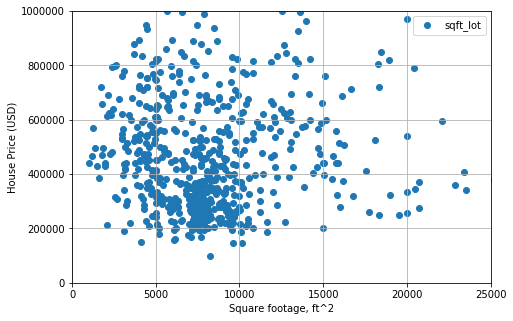

In [18]:
vars = [
        'sqft_lot',
        ]
# Iterate over feature names.
for var in vars:
    plt.scatter(df_num[var],
                df_num['House Price'],
               label=var )
plt.xlabel('Square footage, ft^2')
plt.ylabel('House Price (USD)')
plt.gcf().set_size_inches(7.5, 5)
plt.xlim(0,25000)
plt.ylim(0, 1000000)
plt.grid()
plt.legend(loc='best')
plt.show()

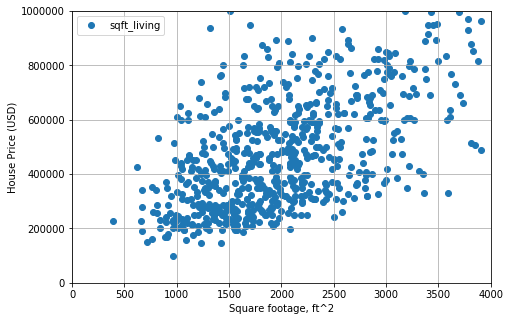

In [19]:
vars = ['sqft_living',
        
        ]
# Iterate over feature names.
for var in vars:
    plt.scatter(df_num[var],
                df_num['House Price'],
               label=var )
plt.xlabel('Square footage, ft^2')
plt.ylabel('House Price (USD)')
plt.gcf().set_size_inches(7.5, 5)
plt.xlim(0, 4000)
plt.ylim(0, 1000000)
plt.grid()
plt.legend(loc='best')
plt.show()

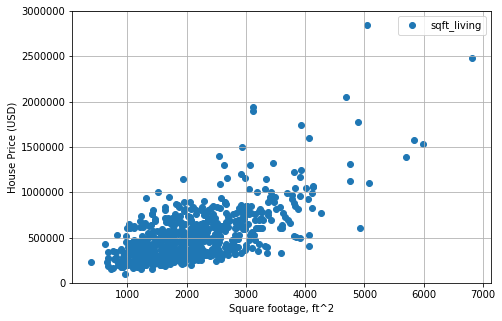

In [20]:
vars = ['sqft_living',
        
        ]
# Iterate over feature names.
for var in vars:
    plt.scatter(df_num[var],
                df_num['House Price'],
               label=var )
plt.xlabel('Square footage, ft^2')
plt.ylabel('House Price (USD)')
plt.gcf().set_size_inches(7.5, 5)
plt.ylim(0, 3000000)
plt.grid()
plt.legend(loc='best')
plt.show()

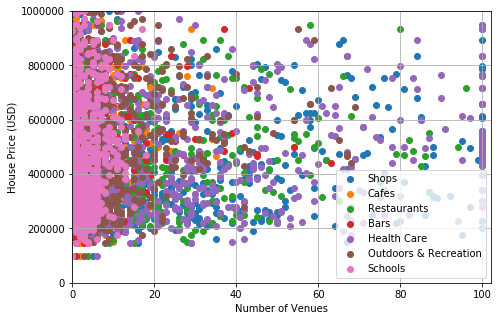

In [21]:
vars = ['Shops',
        'Cafes',
        'Restaurants',
        'Bars',
        'Health Care',
        'Outdoors & Recreation',
        'Schools']
for var in vars:
    plt.scatter(df_num[var],
                df_num['House Price'],
                label=var)
plt.xlabel('Number of Venues')
plt.ylabel('House Price (USD)')
plt.gcf().set_size_inches(7.5, 5)
plt.ylim(0, 1000000)
plt.xlim([0, 102])
plt.grid()
plt.legend(loc='best')
plt.show()

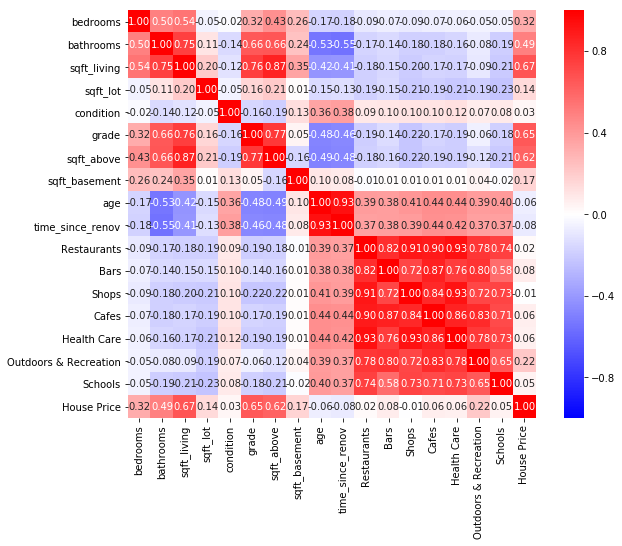

In [22]:
#Correclation Matrix
sns.heatmap(df_num.corr(),
            annot=True,
            fmt=".2f",
            square=True,
            cmap='bwr',
            vmin=-1.,
            vmax=1.)
plt.gcf().set_size_inches(10, 7.5)
plt.show()

## Build a regression model

In [23]:
# Specify the models.
models = { 'All Stats': [
                'bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'condition',
                'grade',
                'sqft_above',
                'sqft_basement',
                'age',
                'time_since_renov',
                                ],
    
         'Selected Stats': [
                'bedrooms',
                'bathrooms',
                'sqft_living',
               # 'sqft_lot',
                'grade',
                'sqft_above',
                #'sqft_basement'
                                ],
         'All Stats & All Venues': [
                'bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'condition',
                'grade',
                'sqft_above',
                'sqft_basement',
                'age',
                'time_since_renov',
                'Restaurants',
                'Bars',
                'Shops',
                'Cafes',
                'Health Care',
                'Outdoors & Recreation',
                'Schools',
                             ],
          'All Stats & Selected Venues': [
                'bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'condition',
                'grade',
                'sqft_above',
                'sqft_basement',
                'age',
                'time_since_renov',
               # 'Restaurants',
               # 'Shops',
               # 'Cafes',
               #'Health Care',
               # 'Bars',
              #  'Schools'
                'Outdoors & Recreation'              ]
          
            
            }

In [24]:
# Function for k-fold model testing over multple random realizations.
def evaluate_regression_model(df, model, n_splits=4, n_repeats=25):
    # Alloctate the number arrays.
    r2 = np.zeros(n_repeats*n_splits)
    rms = np.zeros_like(r2)
    err = np.zeros_like(r2)
    coeff = np.zeros((1,len(model)))

    # k-fold split of the dataset repeated n_repeats times.
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
    X = np.asanyarray(df[model])
    y = np.asanyarray(df[['House Price']])

    n = 0
    for train_index, test_index in rkf.split(X):
        # Split the data.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the linear regression model.
        regr = linear_model.LinearRegression()
        regr.fit(X_train, y_train)
        y_hat = regr.predict(X_test)

        # Evaluate the performance scores.
        r2[n] = regr.score(X_test, y_test)
        rms[n] = np.mean((y_hat - y_test)**2.)
        err[n] = np.std(y_hat - y_test)
        coeff += regr.coef_
        n += 1

    # Normalize the regression coefficients.
    coeff /= n

   # Specify the coefficient names.
    columns = [column.replace(') (USD)', ')').replace('(m)', '(USD/m)').replace('(km)', '(USD/km)')
               for column in ['%s (USD)' % column for column in model]]
    # Create the regression coefficient dataframe.
    df_coeff = pd.DataFrame([list(coeff[0,:])], columns=columns)

    return (r2, rms, err, df_coeff)

In [25]:
# Compute performance scores for all models.
models_r2 = {}
models_rms = {}
models_err = {}
for model_name in models:
    r2, rms, err, _ = evaluate_regression_model(df_num, models[model_name])
    models_r2[model_name] = r2
    models_rms[model_name] = rms
    models_err[model_name] = err

# Create the dataframes with model scores.
df_r2 = pd.DataFrame(models_r2)
df_rms = pd.DataFrame(models_rms)
df_err = pd.DataFrame(models_err)

## Model Evaluation
### Compare the model R^2 scores.

In [26]:
df_r2.describe()

,All Stats,Selected Stats,All Stats & All Venues,All Stats & Selected Venues
count,100.000000,100.000000,100.000000,100.000000
mean,0.581258,0.479405,0.620682,0.610942
std,0.074276,0.077678,0.077455,0.075395
min,0.414307,0.238659,0.412369,0.425828
25%,0.521361,0.430189,0.562979,0.552020
50%,0.578681,0.491177,0.613955,0.608074
75%,0.639449,0.539132,0.679872,0.668601
max,0.739645,0.635993,0.790658,0.780707


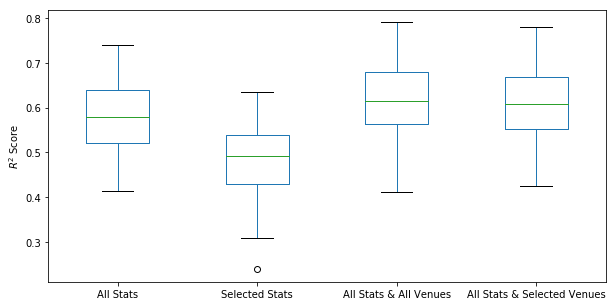

In [27]:
df_r2.plot(kind='box', figsize=(10, 5))
plt.ylabel('$R^2$ Score')
plt.show()

### Compare Residual Mean Square (RMS) errors

In [28]:
df_rms.describe()

,All Stats,Selected Stats,All Stats & All Venues,All Stats & Selected Venues
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.603439e+10,4.482859e+10,3.271738e+10,3.356633e+10
std,8.033108e+09,8.842747e+09,8.342319e+09,8.333248e+09
min,2.161694e+10,2.638141e+10,1.825402e+10,1.967872e+10
25%,2.985565e+10,3.838600e+10,2.603162e+10,2.692087e+10
50%,3.431860e+10,4.340453e+10,3.018358e+10,3.128104e+10
75%,4.162576e+10,5.166390e+10,3.844623e+10,3.968623e+10
max,5.890612e+10,6.720969e+10,5.511125e+10,5.660596e+10


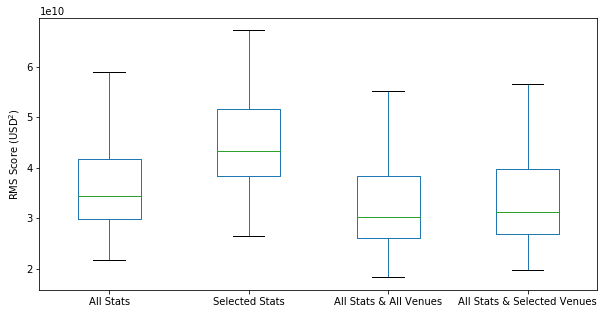

In [29]:
df_rms.plot(kind='box', figsize=(10, 5))
plt.ylabel('RMS Score (USD$^2$)')
plt.show()

### Compare Root Mean Square errors

In [30]:
df_err.describe()

,All Stats,Selected Stats,All Stats & All Venues,All Stats & Selected Venues
count,100.000000,100.000000,100.000000,100.000000
mean,187992.452916,209945.048436,178715.007401,181073.959502
std,20941.491653,20935.083161,22825.540206,22544.618926
min,143110.851804,157927.183508,135105.559655,137069.738099
25%,172498.175444,194968.678685,161326.421003,162836.544158
50%,184844.661023,208111.843597,173225.216869,176406.172306
75%,203335.985031,226113.747930,195490.924439,198649.780982
max,242638.469637,259247.588879,234743.077603,237881.402239


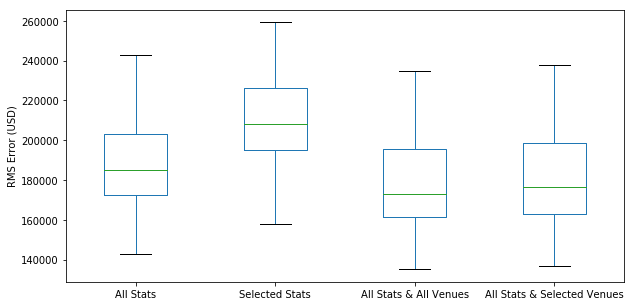

In [31]:
df_err.plot(kind='box', figsize=(10, 5))
plt.ylabel('RMS Error (USD)')
plt.show()

## Best Model Performance

In [32]:
# Explore feature coefficients
r2, rms, err, df_coeff = evaluate_regression_model(df_num, models['All Stats & All Venues'])
print('R^2 score:  %.4f+/-%.4f.' % (np.mean(r2), np.std(r2)))
print('Residual sum of squares: %.2f+/-%.2f.'  % (np.mean(rms), np.std(rms)))
print('Residual error: %.2f+/-%.2f.'  % (np.mean(err), np.std(err)))
df_coeff.head()

R^2 score:  0.6207+/-0.0771.
Residual sum of squares: 32717384616.79+/-8300502954.33.
Residual error: 178715.01+/-22711.13.


,bedrooms (USD),bathrooms (USD),sqft_living (USD),sqft_lot (USD),condition (USD),grade (USD),sqft_above (USD),sqft_basement (USD),age (USD),time_since_renov (USD),Restaurants (USD),Bars (USD),Shops (USD),Cafes (USD),Health Care (USD),Outdoors & Recreation (USD),Schools (USD)
0,-9094.506748,22409.694899,96.615306,0.505892,31598.548531,95849.223521,76.231525,20.383781,3499.850054,-531.259721,-2949.912751,881.018316,-836.666314,-8074.688092,1487.819814,9242.843105,9082.308955


## Visual evaluation of the best model performance

In [33]:
# Function for plotting distributions.
def plot_distribution(red, blue, red_name, blue_name, title):
    plt.figure(figsize=(7.5, 5))
    ax1 = sns.distplot(red, hist=False, color="tab:red", label=red_name)
    ax2 = sns.distplot(blue, hist=False, color="tab:blue", label=blue_name, ax=ax1)
    plt.title(title)
    plt.xlabel('House Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 3000000)
    plt.ylim(0, .0000025)
    plt.show()

In [34]:
model = 'All Stats & All Venues'

# Split the dataset into training and testing parts.
msk = np.random.rand(len(df_num)) < 0.75
train = df_num[msk]
test = df_num[~msk]

# Build the linear regression model.
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[models[model]])
y_train = np.asanyarray(train[['House Price']])
regr.fit(x_train, y_train)

# Evaluate the model performance.
y_hat_train = regr.predict(train[models[model]])
y_hat_test = regr.predict(test[models[model]])
x_test = np.asanyarray(test[models[model]])
y_test = np.asanyarray(test[['House Price']])
print("Residual sum of squares: %.2f."  % np.mean((y_hat_test - y_test)**2.))
print('R2-value: %.4f.' % r2_score(y_test, y_hat_test))

Residual sum of squares: 22981693823.97.
R2-value: 0.7235.


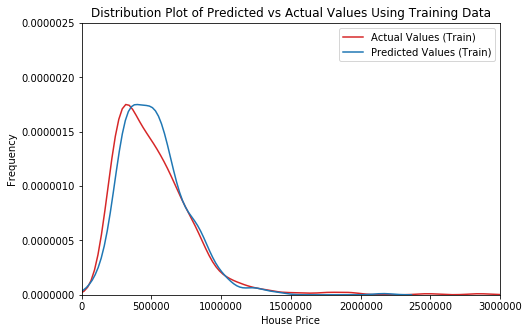

In [35]:
plot_distribution(y_train, y_hat_train,
        'Actual Values (Train)',
        'Predicted Values (Train)',
        'Distribution Plot of Predicted vs Actual Values Using Training Data')

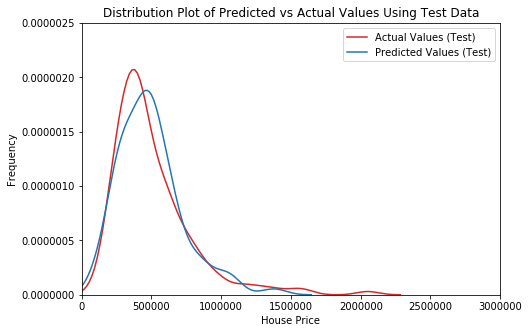

In [36]:
plot_distribution(y_test, y_hat_test,
        'Actual Values (Test)',
        'Predicted Values (Test)',
        'Distribution Plot of Predicted vs Actual Values Using Test Data')